<a href="https://colab.research.google.com/github/ArpanGyawali/CNN_models/blob/main/Optimized_Inception_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D
from keras.layers.merge import concatenate
from keras.utils.vis_utils import plot_model

In [11]:
def inception(layer_in, n_f1, n_f21, n_f22, n_f31, n_f32, n_f4):
  conv1 = Conv2D(n_f1, (1,1), activation='relu', padding='same')(layer_in)
  conv3 = Conv2D(n_f21, (1,1), activation='relu', padding='same')(layer_in)
  conv3 = Conv2D(n_f22, (3,3), activation='relu', padding='same')(conv3)
  conv5 = Conv2D(n_f31, (1,1), activation='relu', padding='same')(layer_in)
  conv5 = Conv2D(n_f32, (5,5), activation='relu', padding='same')(conv5)
  pool = MaxPooling2D((3,3), strides=(1, 1), padding='same')(layer_in)
  pool = Conv2D(n_f4, (1,1), activation='relu', padding='same')(pool)

  layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)
  return layer_out

In [12]:
visible = Input(shape=(256, 256, 3))
layer1 = inception(visible, 64, 96, 128, 16, 32, 32)
layer2 = inception(layer1, 128, 128, 192, 32, 96, 64)
model = Model(inputs = visible, outputs = layer2)

In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_13 (Conv2D)             (None, 256, 256, 96  384         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_15 (Conv2D)             (None, 256, 256, 16  64          ['input_4[0][0]']                
                                )                                                             

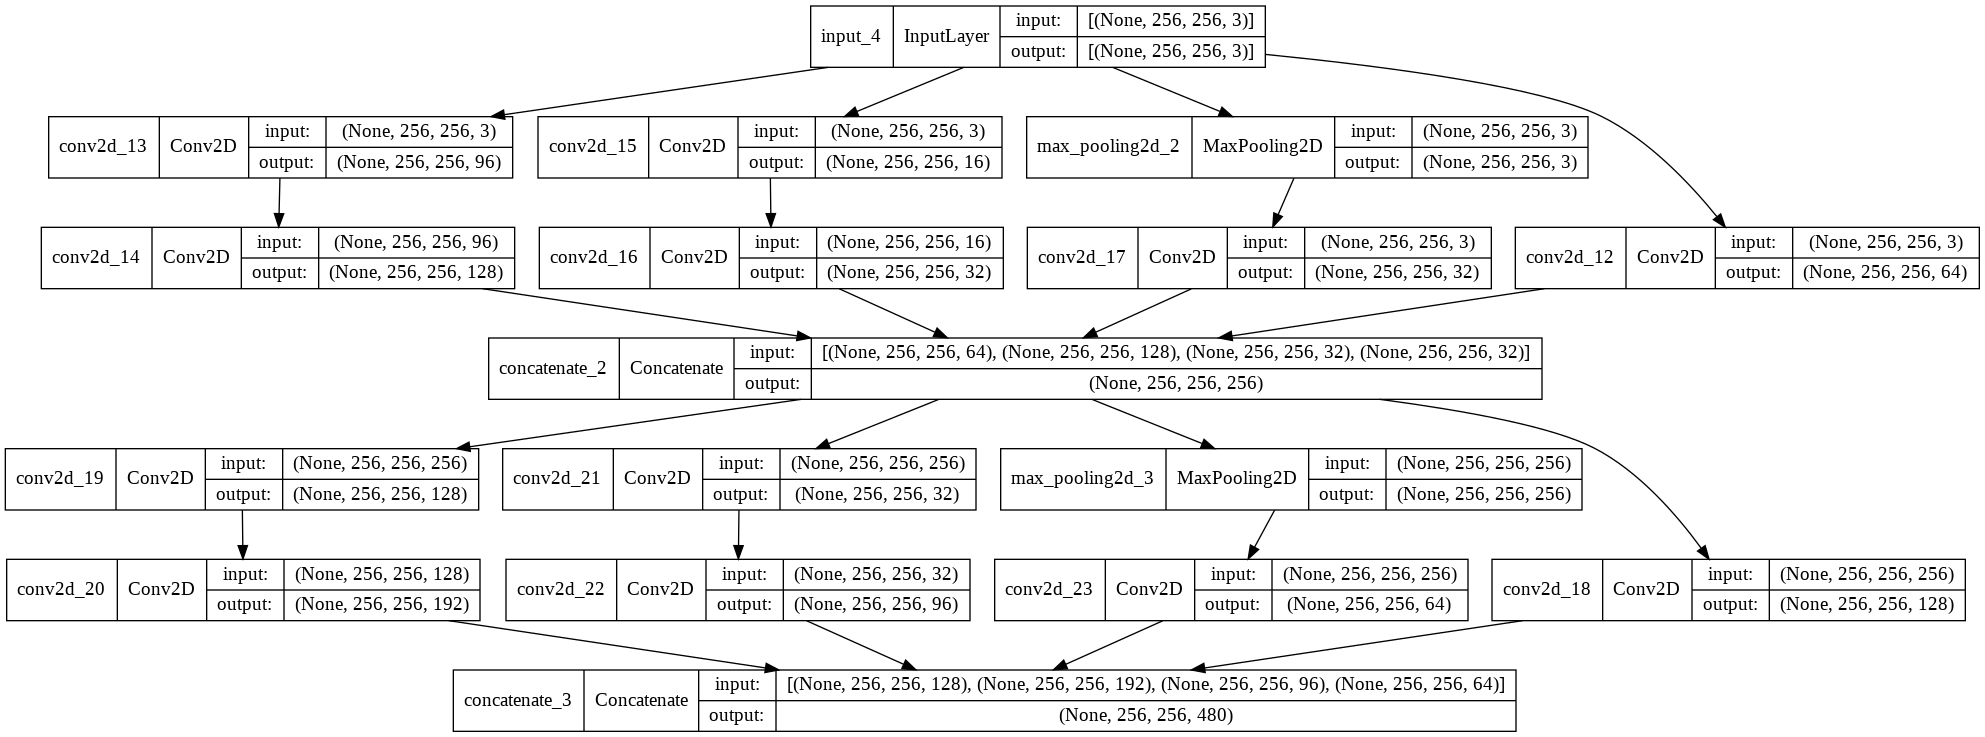

In [15]:
plot_model(model, show_shapes=True, to_file='inception_model.png')